In [ ]:
import numpy as np
import cv2

In [ ]:
def T(v):
    w = np.zeros((3,1))
    w[0,0] = 3*v[0,0]
    w[2,0] = -2*v[1,0]

    return w

v= np.array([[3],[5]])
w=T(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

In [ ]:
print(w)

In [ ]:
w = np.zeros((3,1))
print(w)

## Linear transformatios

In [ ]:
u = np.array([[1], [-2]])
v = np.array([[2], [4]])

k = 7

print("T(k*v):\n", T(k*v), "\n k*T(v):\n", k*T(v), "\n\n")
print("T(u+v):\n", T(u+v), "\n T(u)+T(v):\n", T(u)+T(v))

## Horizontal scaling (Dilation)

In [14]:
def T_hscaling(v):
    A=np.array([[2,0],[0,1]])
    w= A @ v

    return w

def transform_vectors(T, v1, v2):
    V= np.hstack((v1,v2))
    w=T(V)

    return w

e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_hscaling = transform_vectors(T_hscaling, e1, e2)

print("Original vectors:\n e1= \n", e1, "\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_hscaling)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[2 0]
 [0 1]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

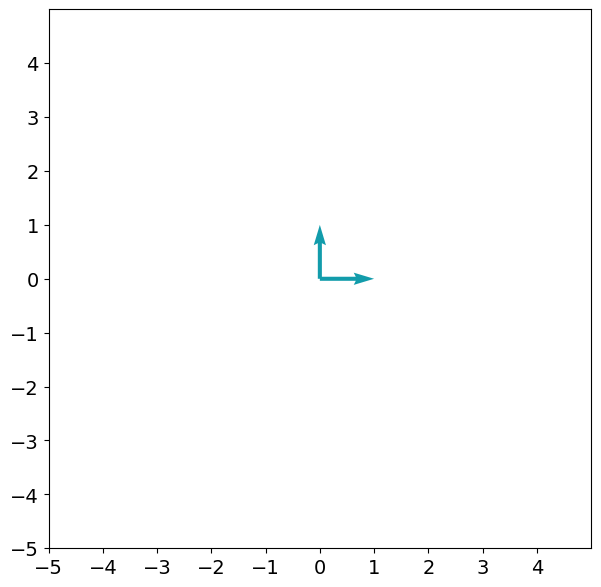

In [15]:
import matplotlib.pyplot as plt

def plot_transformation(T, e1, e2):
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-5, 5))
    ax.set_yticks(np.arange(-5, 5))
    
    plt.axis([-5, 5, -5, 5])
    plt.quiver([0, 0],[0, 0], [e1[0], e2[0]], [e1[1], e2[1]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, e2[0], e1[0], e1[0]], 
             [0, e2[1], e2[1], e1[1]], 
             color=color_original)
    e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)])
    ax.text(e1[0]-0.2+e1_sgn[0], e1[1]-0.2+e1_sgn[1], f'$e_1$', fontsize=14, color=color_original)
    e2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2)])
    ax.text(e2[0]-0.2+e2_sgn[0], e2[1]-0.2+e2_sgn[1], f'$e_2$', fontsize=14, color=color_original)
    
    e1_transformed = T(e1)
    e2_transformed = T(e2)
    
    plt.quiver([0, 0],[0, 0], [e1_transformed[0], e2_transformed[0]], [e1_transformed[1], e2_transformed[1]], 
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,e2_transformed[0], e1_transformed[0]+e2_transformed[0], e1_transformed[0]], 
             [0,e2_transformed[1], e1_transformed[1]+e2_transformed[1], e1_transformed[1]], 
             color=color_transformed)
    e1_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1_transformed)])
    ax.text(e1_transformed[0]-0.2+e1_transformed_sgn[0], e1_transformed[1]-e1_transformed_sgn[1], 
            f'$T(e_1)$', fontsize=14, color=color_transformed)
    e2_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2_transformed)])
    ax.text(e2_transformed[0]-0.2+e2_transformed_sgn[0], e2_transformed[1]-e2_transformed_sgn[1], 
            f'$T(e_2)$', fontsize=14, color=color_transformed)
    
    plt.gca().set_aspect("equal")
    plt.show()
    
plot_transformation(T_hscaling, e1, e2)

### 4.2 - Example 2: Reflection about y-axis (the vertical axis)

In [16]:
def T_reflection_yaxis(v):
    A = np.array([[-1,0], [0,1]])
    w = A @ v
    
    return w
    
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_reflection_yaxis = transform_vectors(T_reflection_yaxis, e1, e2)

print("Original vectors:\n e1= \n", e1,"\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_reflection_yaxis)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[-1  0]
 [ 0  1]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

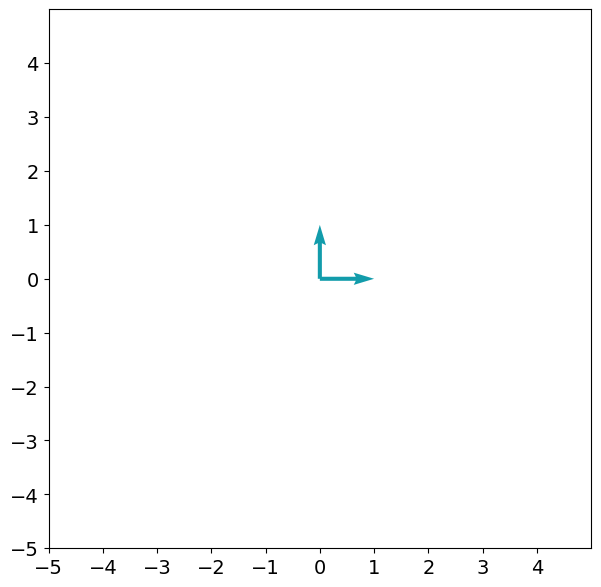

In [17]:
plot_transformation(T_reflection_yaxis, e1, e2)

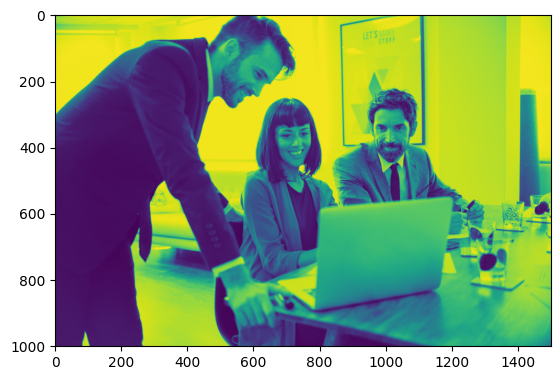

In [20]:
img = cv2.imread('test_image.jpg', 0)
plt.imshow(img)

### rotate this image

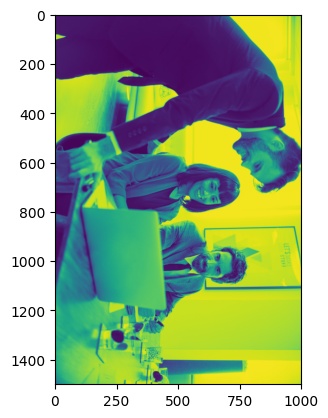

In [21]:
image_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(image_rotated)

### Applying the shear we will get the following output

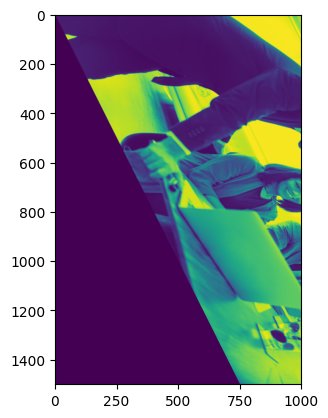

In [22]:
rows,cols = image_rotated.shape
# 3 by 3 matrix as it is required for the OpenCV library, don't worry about the details of it for now.
M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
image_rotated_sheared = cv2.warpPerspective(image_rotated, M, (int(cols), int(rows)))
plt.imshow(image_rotated_sheared)

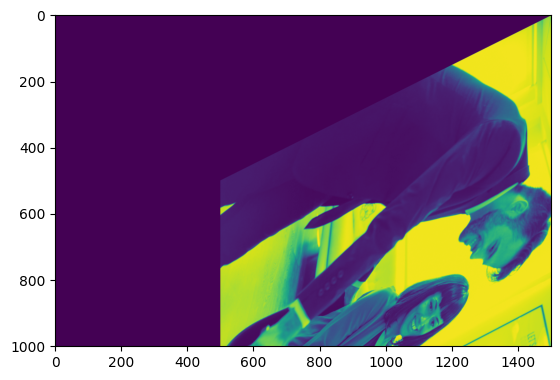

In [23]:
image_sheared = cv2.warpPerspective(img, M, (int(cols), int(rows)))
image_sheared_rotated = cv2.rotate(image_sheared, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image_sheared_rotated)

In [24]:
M_rotation_90_clockwise = np.array([[0, 1], [-1, 0]])
M_shear_x = np.array([[1, 0.5], [0, 1]])

print("90 degrees clockwise rotation matrix:\n", M_rotation_90_clockwise)
print("Matrix for the shear along x-axis:\n", M_shear_x)

90 degrees clockwise rotation matrix:
 [[ 0  1]
 [-1  0]]
Matrix for the shear along x-axis:
 [[1.  0.5]
 [0.  1. ]]


In [25]:
print("M_rotation_90_clockwise by M_shear_x:\n", M_rotation_90_clockwise @ M_shear_x)
print("M_shear_x by M_rotation_90_clockwise:\n", M_shear_x @ M_rotation_90_clockwise)

M_rotation_90_clockwise by M_shear_x:
 [[ 0.   1. ]
 [-1.  -0.5]]
M_shear_x by M_rotation_90_clockwise:
 [[-0.5  1. ]
 [-1.   0. ]]
